<a href="https://colab.research.google.com/github/Sihan-A/Pydata_2e_Chinese_Notebook/blob/main/ch11_%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

没完成的
1. 表11-1
2. 表11-2
3. 表11-3

# 11 时间序列

- 固定频率
- 不规则


1. 时间戳
2. 固定的时间区间
3. 时间间隔
4. 实验时间或消耗时间

Pandas的时间模块
1. datetime
2. time
3. calendar

In [1]:
# 导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(12345) # seed the generator
plt.rc('figure', figsize=(10, 6)) # 设置 figure size
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20 # 设置
# 控制打印输出
np.set_printoptions(precision=4, # 控制输出的小数点个数，默认是 precision = 8
                    suppress=True) # 当 suppress=True，表示小数不需要以科学计数法的形式输出

## 11.1 日期和时间数据的类型及工具

In [4]:
from datetime import datetime # 导入 datatime 模块
now = datetime.now() # 现在时间
now # 显示现在时间

datetime.datetime(2021, 9, 3, 1, 29, 43, 393054)

In [5]:
now.year, now.month, now.day # 年月日

(2021, 9, 3)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15) # 时间间隔
delta # 显示时间间隔

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

datetime对象加减一个timedelta或其整数倍来产生一个新的datetime对象

In [11]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12) # 加

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2 * timedelta(12) # 减整数倍

datetime.datetime(2010, 12, 14, 0, 0)

表11-1：datetime模块中的类型

### 11.1.1 字符串与datetime互相转换

`str()`方法或传递一个指定的格式给`strftime()`方法来对`datetime`对象和pandas的`Timestamp`对象进行格式化

In [14]:
stamp = datetime(2011, 1, 3) # datetime对象
str(stamp) # 用 str() 方法转为字符串

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d') # 传递一个指定的格式给strftime()

'2011-01-03'

表11-2

使用`datetime.srtptime()`：字符串 + 指定格式 → 日期

In [16]:
value = '2011-01-03' # 创建字符串
datetime.strptime(value, '%Y-%m-%d') # 字符串 → 时间

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
datestrs = ['7/6/2011', '8/6/2011'] # 创建列表
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs] # 列表生成器

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

第三方dateutil包的parser.parse方法

In [18]:
from dateutil.parser import parse
parse('2011-01-03') # 字符串 → 日期

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
parse('Jan 31, 1997 10:45 PM') # 能够解析大部分人类可理解的日期表示

datetime.datetime(1997, 1, 31, 22, 45)

In [23]:
parse('6/12/2011',
      dayfirst=True) # 日期在月份之前

datetime.datetime(2011, 12, 6, 0, 0)

`to_datetime()`可以转换很多不同的日期表格格式

In [26]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00'] # 列表
pd.to_datetime(datestrs) # 传入列表，得到datetime对象

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [30]:
idx = pd.to_datetime(datestrs + [None]) # 还可以处理缺失值
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

NaT（not a time）是时间戳数据中的null值

In [28]:
idx[2] # 索引

NaT

In [31]:
pd.isnull(idx) # 判断是否为缺失值

array([False, False,  True])

表11-3

## 11.2 时间序列基础

In [34]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), # datetime 对象的列表
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), # series的值
               index=dates) # 索引为 datetime 对象
ts

2011-01-02    0.274992
2011-01-05    0.228913
2011-01-07    1.352917
2011-01-08    0.886429
2011-01-10   -2.001637
2011-01-12   -0.371843
dtype: float64

In [36]:
ts.index # 查看索引

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [42]:
ts[::2] # 步长为2的切片，也就是每隔一个取一值

2011-01-02    0.274992
2011-01-07    1.352917
2011-01-10   -2.001637
dtype: float64

In [40]:
ts + ts[::2] # 日期自定对齐，没有对应日期返回NaN

2011-01-02    0.549983
2011-01-05         NaN
2011-01-07    2.705834
2011-01-08         NaN
2011-01-10   -4.003275
2011-01-12         NaN
dtype: float64

In [46]:
ts.index.dtype # 索引的数据类型是datetime64

dtype('<M8[ns]')

DatetimeIndex中的标量值是pandas的TimeStamp对象

In [47]:
stamp = ts.index[0] # 索引切片
stamp

Timestamp('2011-01-02 00:00:00')

### 11.2.1 索引，选择，子集

In [51]:
stamp = ts.index[2] # 索引
ts[stamp] # 用索引来选择

1.3529168351654497

In [52]:
ts['1/10/2011']

-2.0016373096603974

In [53]:
ts['20110110']

-2.0016373096603974

In [ ]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [ ]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [ ]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [ ]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [ ]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [ ]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [ ]:
dup_ts.index.is_unique

False

In [ ]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [ ]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [ ]:
ts
resampler = ts.resample('D')

### Generating Date Ranges

In [ ]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [ ]:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [ ]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [ ]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [ ]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
Hour(2) + Minute(30)

<150 * Minutes>

In [ ]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [ ]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [ ]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

ts / ts.shift(1) - 1

In [ ]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [ ]:
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
dtype: float64

#### Shifting dates with offsets

In [ ]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [ ]:
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [ ]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [ ]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [ ]:
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## Time Zone Handling

In [ ]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [ ]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [ ]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [ ]:
print(ts.index.tz)

None


In [ ]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [ ]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64

In [ ]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−Aware Timestamp Objects

In [ ]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [ ]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [ ]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [ ]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [ ]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [ ]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [ ]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

In [ ]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [ ]:
p + 5
p - 2

Period('2005', 'A-DEC')

In [ ]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [ ]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [ ]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [ ]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [ ]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [ ]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [ ]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [ ]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [ ]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [ ]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [ ]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [ ]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [ ]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

In [ ]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [ ]:
pts = ts2.to_period()
pts

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [ ]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [ ]:
data = pd.read_csv('examples/macrodata.csv') # 导入文件
data.head(5) # 显示前5行

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [ ]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [ ]:
index = pd.PeriodIndex(year=data.year,
                       quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [ ]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [ ]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

### Downsampling

In [ ]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [ ]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [ ]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [ ]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [ ]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-101-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [ ]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [ ]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [ ]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [ ]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [ ]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [ ]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


### Resampling with Periods

In [ ]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [ ]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [ ]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


## Moving Window Functions

In [ ]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

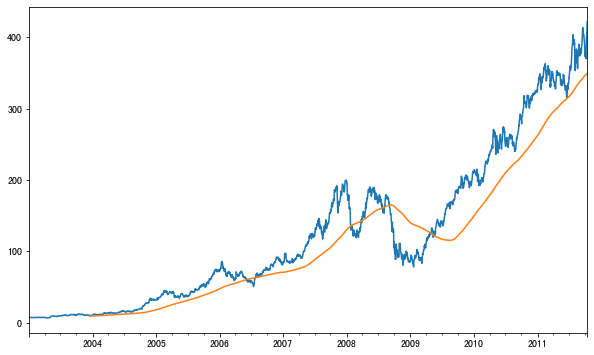

In [ ]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

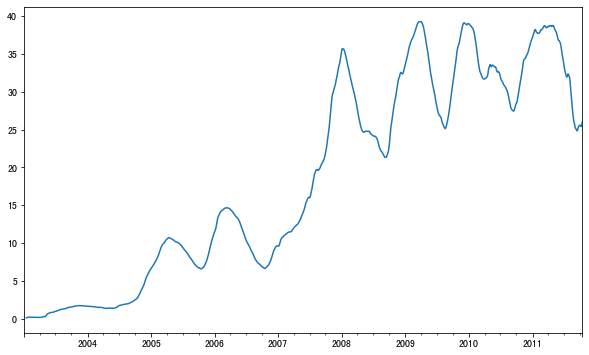

In [ ]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [ ]:
expanding_mean = appl_std250.expanding().mean()

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

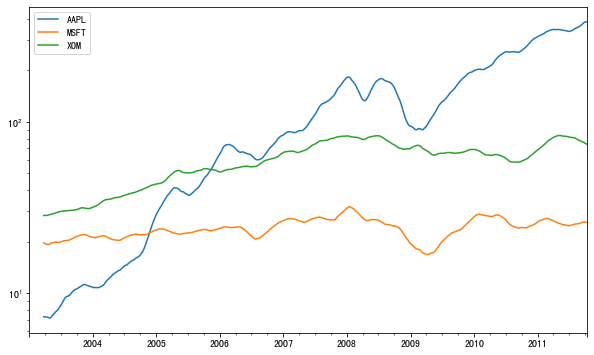

In [ ]:
close_px.rolling(60).mean().plot(logy=True)

In [ ]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

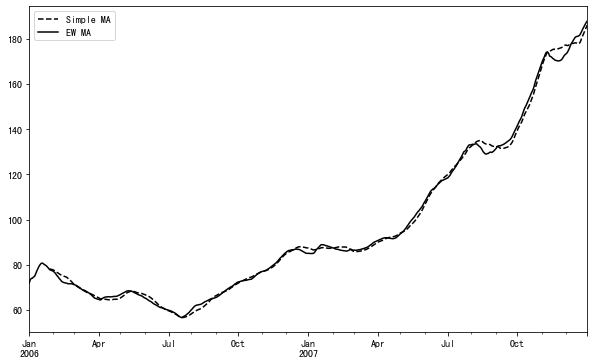

In [ ]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

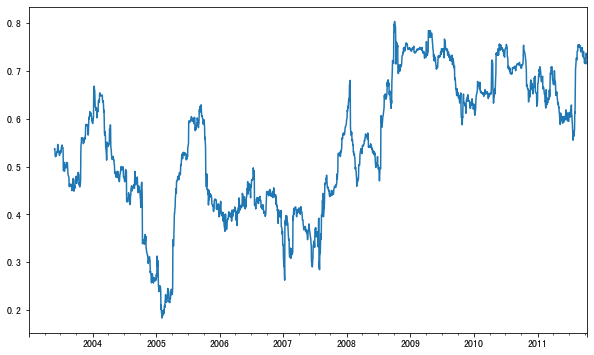

In [ ]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

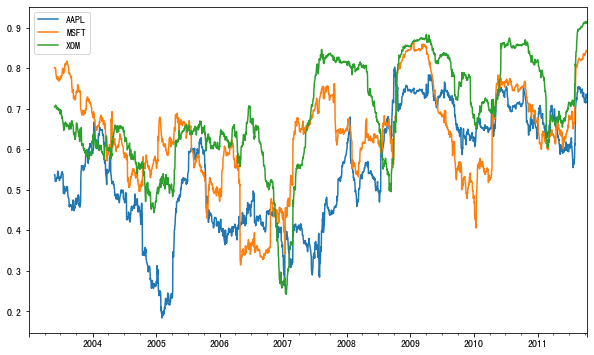

In [ ]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [ ]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

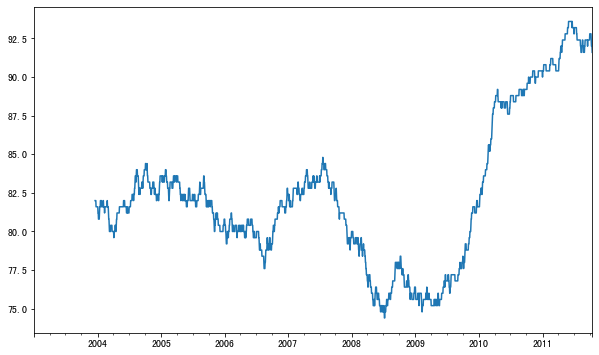

In [ ]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion